# Project :Trivago Data Set Analysis 

# Data Exploration & Feature Engineering 

## Initializing Packages 

In [1]:
import pandas as pd          
import numpy as np  # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 

import seaborn as sns
from sklearn.model_selection import train_test_split
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings warnings.filterwarnings("ignore")

In [ ]:
from sklearn.metrics import mean_squared_error

# Loading Data

In [2]:
# Assign spreadsheet filename to `file`
file = 'click_pred_data.xlsx'

# Load spreadsheet
xl = pd.ExcelFile(file)

# Print the sheet names
print(xl.sheet_names)

# Load a sheet into a DataFrame by name: DataSet
DataSet = xl.parse('Sheet1')

print(DataSet.shape)

['Sheet1']
(800268, 29)


### Given data is called data

In [3]:
data = DataSet
data1 = data
data.head()

,Id,trivago_id,hotel_impr,avg_cpc,clicks,booking_value_index,stars,rating,weekday,log_date,...,profit,revenue,total_night,total_rooms,bolge,holiday_diff,days_of_holiday,Status,kur,opp_cpc
0,1,3503572,113,0.06,0,1,0,84.90,Thursday,2018-10-11 00:00:00.000,...,-1.11,0.000000e+00,0.0,0.0,ic_anadolu,18,3,Gök Gürültülü Sağnak Yağmur,6.9211,0.08
1,2,921561,437,0.06,1,1,3,83.53,Thursday,2018-10-11 00:00:00.000,...,0.00,0.000000e+00,0.0,0.0,marmara,18,3,Yağmurlu,6.9211,0.17
2,3,4928304,613,0.16,23,4,0,78.87,Thursday,2018-10-11 00:00:00.000,...,1981-11-01 00:00:00,3.750000e+09,1.0,1.0,marmara,18,3,Yağmurlu,6.9211,0.23
3,4,112719,4473,0.08,80,1,4,77.85,Sunday,2018-05-20 00:00:00.000,...,58.59,5.920500e+09,2.0,2.0,ege,25,4,Güneşli,5.4015,0.08
4,5,1625365,520,0.11,6,1,0,74.97,Sunday,2018-06-03 00:00:00.000,...,20.67,3.425850e+09,1.0,1.0,ic_anadolu,11,4,ParçalıBulutlu,5.4238,0.16


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800268 entries, 0 to 800267
Data columns (total 29 columns):
Id                     800268 non-null int64
trivago_id             800268 non-null int64
hotel_impr             800268 non-null int64
avg_cpc                791218 non-null float64
clicks                 800268 non-null int64
booking_value_index    800268 non-null int64
stars                  800268 non-null int64
rating                 800268 non-null float64
weekday                800268 non-null object
log_date               800268 non-null object
hotel_types            800268 non-null object
my_min_position        701182 non-null float64
my_price               701182 non-null float64
top4_min_price         799746 non-null float64
total_min_price        800268 non-null int64
rival1_price           550570 non-null float64
rival1_min_position    550570 non-null float64
rival2_price           458184 non-null float64
rival2_min_position    458184 non-null float64
profit       

In [5]:
data.describe()

,Id,trivago_id,hotel_impr,avg_cpc,clicks,booking_value_index,stars,rating,my_min_position,my_price,...,rival1_min_position,rival2_price,rival2_min_position,revenue,total_night,total_rooms,holiday_diff,days_of_holiday,kur,opp_cpc
count,800268.000000,8.002680e+05,800268.000000,791218.000000,800268.000000,800268.000000,800268.000000,800268.000000,701182.000000,701182.000000,...,550570.000000,458184.000000,458184.000000,7.715070e+05,771507.000000,771507.000000,800268.000000,800268.000000,663298.000000,787785.000000
mean,400462.518605,3.931219e+06,718.808298,0.057824,11.673548,2.317096,1.801150,61.062208,2.396314,287.246539,...,2.734415,307.276402,3.352891,1.027061e+09,0.247643,0.173818,31.824785,4.108281,6.148209,0.089909
std,231510.453857,2.963412e+06,1350.319142,0.042225,29.965377,1.578553,1.927448,33.913312,4.105354,358.376705,...,4.615098,350.340321,5.691424,5.978201e+09,1.242149,0.862981,28.983523,2.053155,0.750083,0.049472
min,1.000000,9.125000e+03,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,2.000000,4.992000,0.000000
25%,200067.750000,1.672771e+06,97.000000,0.030000,0.000000,1.000000,0.000000,66.720000,1.000000,165.000000,...,1.000000,179.000000,1.000000,0.000000e+00,0.000000,0.000000,10.000000,3.000000,5.478300,0.060000
50%,400134.500000,3.160466e+06,272.000000,0.050000,2.000000,2.000000,0.000000,78.320000,2.000000,223.000000,...,2.000000,242.000000,2.000000,0.000000e+00,0.000000,0.000000,23.000000,4.000000,6.066600,0.080000
75%,600201.250000,5.822542e+06,723.000000,0.070000,11.000000,4.000000,4.000000,82.090000,2.000000,321.000000,...,3.000000,345.000000,3.000000,0.000000e+00,0.000000,0.000000,44.000000,4.000000,6.799000,0.100000
max,802711.000000,1.228660e+07,26645.000000,2.000000,1252.000000,5.000000,5.000000,96.170000,179.000000,54252.000000,...,184.000000,36880.000000,164.000000,3.595593e+11,64.000000,42.000000,112.000000,9.000000,7.860400,0.920000


### Number of unique values in each column

In [6]:
data.apply(lambda x: len(x.unique()))

Id                     800268
trivago_id               6165
hotel_impr              11551
avg_cpc                   110
clicks                    665
booking_value_index         5
stars                       6
rating                   4418
weekday                     7
log_date                  268
hotel_types                 3
my_min_position           135
my_price                 3334
top4_min_price           4586
total_min_price          4438
rival1_price             4849
rival1_min_position       131
rival2_price             3081
rival2_min_position       126
profit                  28154
revenue                 33076
total_night                57
total_rooms                44
bolge                       8
holiday_diff               95
days_of_holiday             4
Status                     30
kur                       187
opp_cpc                   136
dtype: int64

In [7]:
# Check for duplicates in trivago_id feature
idsUnique = len(set(data.trivago_id))
idsTotal = data.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 794103 duplicate IDs for 800268 total entries


### Feature types

In [8]:
numeric_features=data.select_dtypes(include=[np.number])
print(numeric_features.dtypes)

categorical_features=data.select_dtypes(include=[np.object])
print(categorical_features.dtypes)

Id                       int64
trivago_id               int64
hotel_impr               int64
avg_cpc                float64
clicks                   int64
booking_value_index      int64
stars                    int64
rating                 float64
my_min_position        float64
my_price               float64
top4_min_price         float64
total_min_price          int64
rival1_price           float64
rival1_min_position    float64
rival2_price           float64
rival2_min_position    float64
revenue                float64
total_night            float64
total_rooms            float64
holiday_diff             int64
days_of_holiday          int64
kur                    float64
opp_cpc                float64
dtype: object
weekday        object
log_date       object
hotel_types    object
profit         object
bolge          object
Status         object
dtype: object


#### Some variables are given as numeric variables, but they should be treated as categorical

In [9]:
data.trivago_id = data.trivago_id.astype(str)
data.booking_value_index = data.booking_value_index.astype(str)
data.stars = data.stars.astype(str)
data.my_min_position = data.my_min_position.astype(str)
data.rival1_min_position = data.rival1_min_position.astype(str)
data.rival2_min_position = data.rival2_min_position.astype(str)

#### Some variables are given as categorical, but they should be treated as numerical

In [10]:
# profit is given as categorical, but converted to numerical
data['profit'] = pd.to_numeric(data['profit'],errors='coerce')

### Need to change log_date variable to decrease number of categories, so create  new simpler features from log date : log_date_month and log_date_month_year

In [11]:
# month feature from log date
data["log_date_month"] = pd.DataFrame(data["log_date"]).applymap(lambda x:x[5:7])

#month-year  feature from log date
data["log_date"] = pd.DataFrame(data["log_date"]).applymap(lambda x:x[0:7])

#print(data.log_date_month.head())
print(data.log_date.head())
print(data.log_date_month.head())

#data.log_date_month = data.log_date_month.astype(str)
#data.log_date = data.log_date_year_month.astype(str)


0    2018-10
1    2018-10
2    2018-10
3    2018-05
4    2018-06
Name: log_date, dtype: object
0    10
1    10
2    10
3    05
4    06
Name: log_date_month, dtype: object


### 1. Explarotory Data Analysis (EDA)

1.1 Univariate Distribution

1.1.1 Distribution of the target variable : clicks

C:\Users\ASUS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'clicks Distribution')

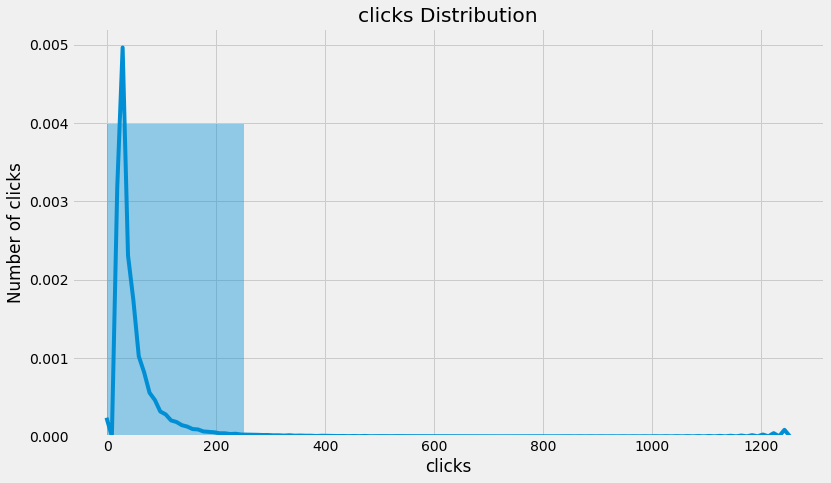

In [12]:

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(data.clicks, bins = 5)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("clicks")
plt.ylabel("Number of clicks")
plt.title("clicks Distribution")

In [13]:
print ("Skew is:", data.clicks.skew())
print("Kurtosis: %f" % data.clicks.kurt())

Skew is: 8.561946255991549
Kurtosis: 134.433457


### 1.1.2 Numerical Variables of the data

In [14]:
numeric_features=data.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                   int64
hotel_impr           int64
avg_cpc            float64
clicks               int64
rating             float64
my_price           float64
top4_min_price     float64
total_min_price      int64
rival1_price       float64
rival2_price       float64
profit             float64
revenue            float64
total_night        float64
total_rooms        float64
holiday_diff         int64
days_of_holiday      int64
kur                float64
opp_cpc            float64
dtype: object

In [15]:
numeric_features.corr()

,Id,hotel_impr,avg_cpc,clicks,rating,my_price,top4_min_price,total_min_price,rival1_price,rival2_price,profit,revenue,total_night,total_rooms,holiday_diff,days_of_holiday,kur,opp_cpc
Id,1.000000,-0.160271,0.068114,-0.078796,-0.098580,-0.038490,-0.011865,-0.015362,-0.009524,-0.058395,0.001039,-0.007208,-0.001957,0.003991,0.520498,0.001864,0.236071,0.062284
hotel_impr,-0.160271,1.000000,0.042797,0.402426,0.187897,0.078607,0.090755,0.093749,0.091658,0.098497,0.092682,0.183958,0.162471,0.146512,-0.122210,0.119426,-0.107266,0.073509
avg_cpc,0.068114,0.042797,1.000000,0.219671,0.079236,-0.017457,-0.026420,-0.027725,-0.032740,-0.021322,0.112883,0.255253,0.284336,0.320377,0.028149,-0.075229,-0.144885,0.779849
clicks,-0.078796,0.402426,0.219671,1.000000,0.073471,-0.028306,-0.012924,-0.012163,0.004317,-0.007566,0.180703,0.408935,0.443829,0.440861,-0.059404,0.067858,-0.062748,0.132404
rating,-0.098580,0.187897,0.079236,0.073471,1.000000,0.062292,0.050330,0.050010,0.039185,0.057373,0.036597,0.061837,0.064537,0.069762,-0.081147,-0.061304,-0.083487,0.122634
my_price,-0.038490,0.078607,-0.017457,-0.028306,0.062292,1.000000,0.615524,0.628447,0.512878,0.658421,0.012299,0.002515,-0.026796,-0.031021,-0.027712,0.046309,0.062235,0.031276
top4_min_price,-0.011865,0.090755,-0.026420,-0.012924,0.050330,0.615524,1.000000,0.961300,0.819275,0.806784,0.008395,0.002222,-0.019701,-0.023858,-0.009683,0.030851,0.044073,0.008198
total_min_price,-0.015362,0.093749,-0.027725,-0.012163,0.050010,0.628447,0.961300,1.000000,0.782539,0.885616,0.008446,0.002309,-0.019932,-0.024248,-0.011244,0.031940,0.035579,0.007783
rival1_price,-0.009524,0.091658,-0.032740,0.004317,0.039185,0.512878,0.819275,0.782539,1.000000,0.683019,0.012450,0.008116,-0.012286,-0.016250,-0.000808,0.036371,0.075011,-0.007261
rival2_price,-0.058395,0.098497,-0.021322,-0.007566,0.057373,0.658421,0.806784,0.885616,0.683019,1.000000,0.014726,0.006984,-0.020999,-0.024351,-0.039680,0.051500,0.064144,0.014946


In [16]:
corr = numeric_features.corr()
print (corr['clicks'].sort_values(ascending=False))

clicks             1.000000
total_night        0.443829
total_rooms        0.440861
revenue            0.408935
hotel_impr         0.402426
avg_cpc            0.219671
profit             0.180703
opp_cpc            0.132404
rating             0.073471
days_of_holiday    0.067858
rival1_price       0.004317
rival2_price      -0.007566
total_min_price   -0.012163
top4_min_price    -0.012924
my_price          -0.028306
holiday_diff      -0.059404
kur               -0.062748
Id                -0.078796
Name: clicks, dtype: float64


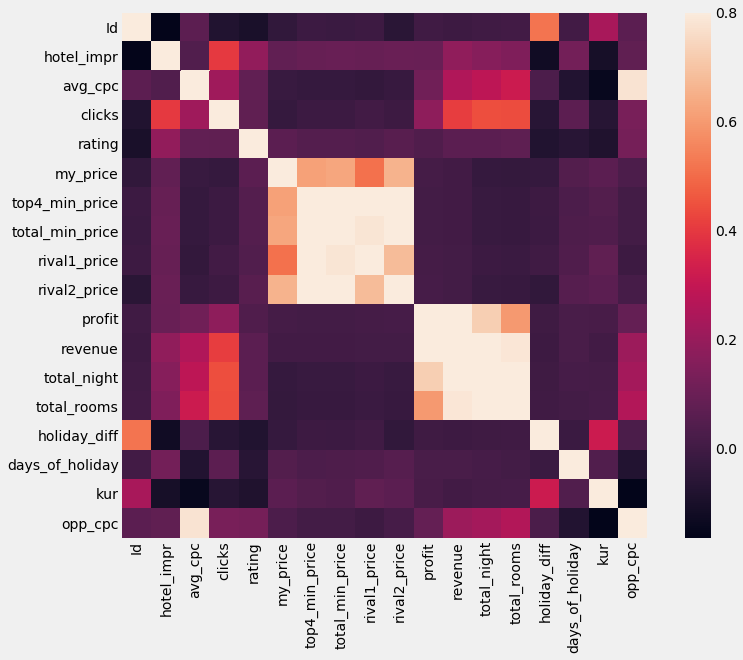

In [17]:
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

## 1.1.3 Categorical Variables

In [18]:
categorical_features=data.select_dtypes(include=[np.object])
categorical_features.dtypes

trivago_id             object
booking_value_index    object
stars                  object
weekday                object
log_date               object
hotel_types            object
my_min_position        object
rival1_min_position    object
rival2_min_position    object
bolge                  object
Status                 object
log_date_month         object
dtype: object

##### Feature Engineering : Need to modify categories of some variables before plotting to see correct distributions of categories

In [ ]:
#Change categories of hotel_types:
print ('Original Categories:')
print (data['hotel_types'].value_counts())

print ('\nModified Categories:')
data['hotel_types'] = data['hotel_types'].replace({'Summer':'summer','Summer ':'summer'})
print (data['hotel_types'].value_counts())

Original Categories:
City       541296
Summer     234007
Summer      24965
Name: hotel_types, dtype: int64

Modified Categories:
City      541296
summer    258972
Name: hotel_types, dtype: int64


In [ ]:
#Change categories of bolge:
print ('Original Categories:')
print (data['bolge'].value_counts())

print ('\nModified Categories:')
data['bolge'] = data['bolge'].replace({'Marmara':'marmara'})
print (data['bolge'].value_counts())

Original Categories:
marmara              264243
ege                  161768
akdeniz              117941
ic_anadolu            96619
karadeniz             73834
Marmara               50079
guneydogu_anadolu     19759
dogu_anadolu          16025
Name: bolge, dtype: int64

Modified Categories:
marmara              314322
ege                  161768
akdeniz              117941
ic_anadolu            96619
karadeniz             73834
guneydogu_anadolu     19759
dogu_anadolu          16025
Name: bolge, dtype: int64


In [ ]:
#Change categories of Status:
print ('Original Categories:')
print (data['Status'].value_counts())

print ('\nModified Categories:')
data['Status'] = data['Status'].replace({'Az Bulutlu':'AzBulutlu ','Sağanak Yağış':'SağanakYağış','Çoğunlukla Bulutlu':'ÇoğunluklaBulutlu',
                                         'Parçalı Bulutlu':'ParçalıBulutlu','Gök Gürültülü Sağnak Yağmur':'GökGürültülüSağnakYağmur',
                                         'Parçalı Güneşli Sağanak Yağış':'ParçalıGüneşliSağanakYağış',
                                         'Çoğunlukla Bulutlu Sağanak Yağışlı':'Çoğunlukla Bulutlu Sağanak Yağışlı',
                                         'Yoğun Bulutlu':'YoğunBulutlu','AzBulutlu ':'AzBulutlu',
                                         'Çoğunlukla Bulutlu Sağanak Yağışlı':'ÇoğunluklaBulutluSağanakYağışlı'})
print (data['Status'].value_counts())

Original Categories:
Parçalı Bulutlu                       101090
Güneşli                                89800
Az Bulutlu                             75981
Sağanak Yağış                          65917
Çoğunlukla Bulutlu                     63893
Yağmurlu                               62684
ParçalıBulutlu                         62647
GökGürültülüSağnakYağmur               52950
AzBulutlu                              52297
Gök Gürültülü Sağnak Yağmur            25299
Bulutlu                                23150
ÇoğunluklaBulutlu                      17462
Parçalı Güneşli Sağanak Yağış          15665
Sisli                                  13129
Kar Yağışlı                            11612
Karla Karışık Yağmur                    8870
ParçalıGüneşliSağanakYağış              4837
Çoğunlukla Bulutlu Sağanak Yağışlı      4489
SağanakYağış                            2464
Yoğun Bulutlu                           1563
Yoğun Kar Fırtınası                     1163
Parçalı Güneşli Kar Fırtınası     

##### 1.1.3.1 Distribution of the bolge

marmara              314322
ege                  161768
akdeniz              117941
ic_anadolu            96619
karadeniz             73834
guneydogu_anadolu     19759
dogu_anadolu          16025
Name: bolge, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

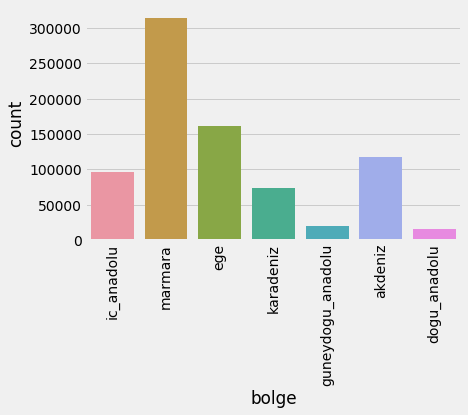

In [ ]:
print(data.bolge.value_counts())
sns.countplot(data.bolge)
plt.xticks(rotation=90)

##### 1.1.3.2 Distribution of the hotel_types

City      541296
summer    258972
Name: hotel_types, dtype: int64


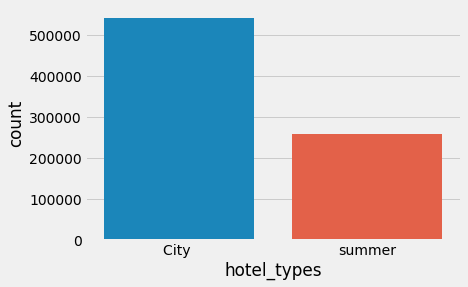

In [ ]:
print(data.hotel_types.value_counts())
sns.countplot(data.hotel_types)

##### 1.1.3.3 Distribution of the status

ParçalıBulutlu                     163737
AzBulutlu                          128278
Güneşli                             89800
ÇoğunluklaBulutlu                   81355
GökGürültülüSağnakYağmur            78249
SağanakYağış                        68381
Yağmurlu                            62684
Bulutlu                             23150
ParçalıGüneşliSağanakYağış          20502
Sisli                               13129
Kar Yağışlı                         11612
Karla Karışık Yağmur                 8870
ÇoğunluklaBulutluSağanakYağışlı      4725
YoğunBulutlu                         1607
Yoğun Kar Fırtınası                  1163
Parçalı Güneşli Kar Fırtınası         365
Rüzgarlı                              257
Çoğunlukla Bulutlu Kar Yağışlı        255
Ara Ara Dolu Yağışı                    92
Yoğun Soğuk                            67
Buzlanma                                4
Name: Status, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

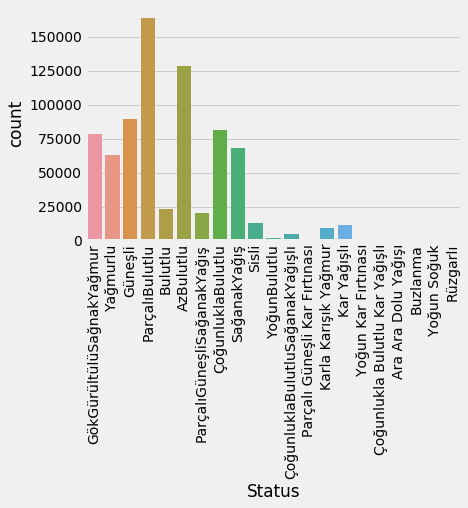

In [ ]:
print(data.Status.value_counts())
sns.countplot(data.Status)
plt.xticks(rotation=90)

##### 1.1.3.4 Distribution of the weekday

Thursday     120321
Wednesday    117295
Monday       115905
Tuesday      114808
Friday       113499
Sunday       113481
Saturday     104959
Name: weekday, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

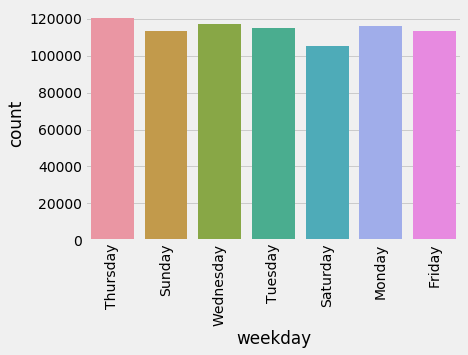

In [ ]:
print(data.weekday.value_counts())
sns.countplot(data.weekday)
plt.xticks(rotation=90)

##### 1.1.3.5.1 Distribution of the log_date

2018-07    100908
2019-01     99179
2018-10     92026
2018-12     88988
2018-06     88008
2018-11     86554
2018-08     83480
2018-05     82746
2018-09     78379
Name: log_date, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

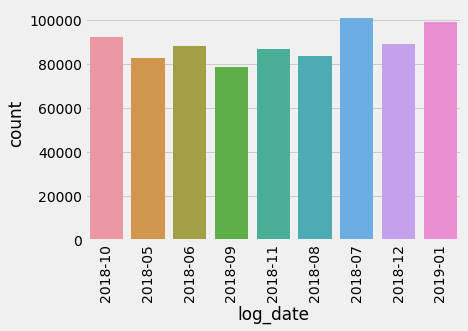

In [ ]:
print(data.log_date.value_counts())
sns.countplot(data.log_date)
plt.xticks(rotation=90)

##### 1.1.3.5.2 Distribution of the log_date_month

07    100908
01     99179
10     92026
12     88988
06     88008
11     86554
08     83480
05     82746
09     78379
Name: log_date_month, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

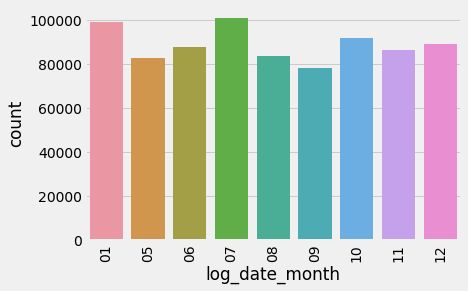

In [ ]:
print(data.log_date_month.value_counts())
sns.countplot(data.log_date_month)
plt.xticks(rotation=90)

## 1.2 Bivariate Disribution (Variable and clicks feature plots)

#### 1.2.1 Numerical Variables and clicks

In [ ]:
numeric_features=data.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                   int64
hotel_impr           int64
avg_cpc            float64
clicks               int64
rating             float64
my_price           float64
top4_min_price     float64
total_min_price      int64
rival1_price       float64
rival2_price       float64
profit             float64
revenue            float64
total_night        float64
total_rooms        float64
holiday_diff         int64
days_of_holiday      int64
kur                float64
opp_cpc            float64
dtype: object

##### 1.2.1.1 hotel_impr and clicks Analysis

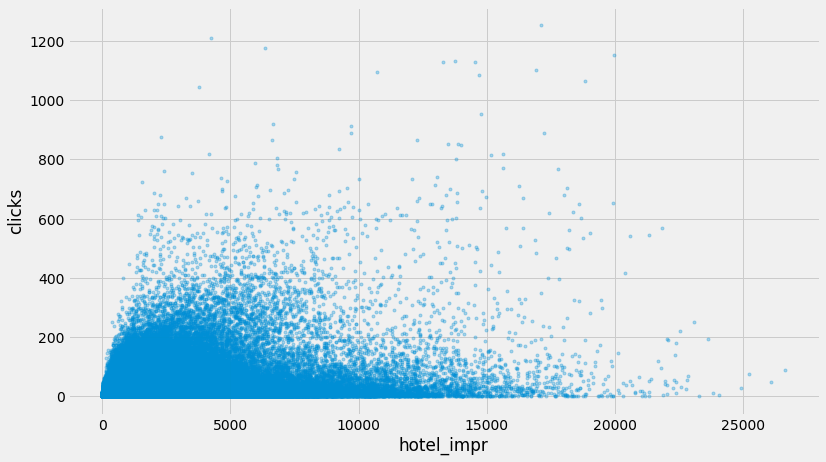

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel("hotel_impr")
plt.ylabel("clicks")
plt.plot(data.hotel_impr, data["clicks"],'.', alpha = 0.3)

##### 1.2.1.2 avg_cpc and clicks Analysis

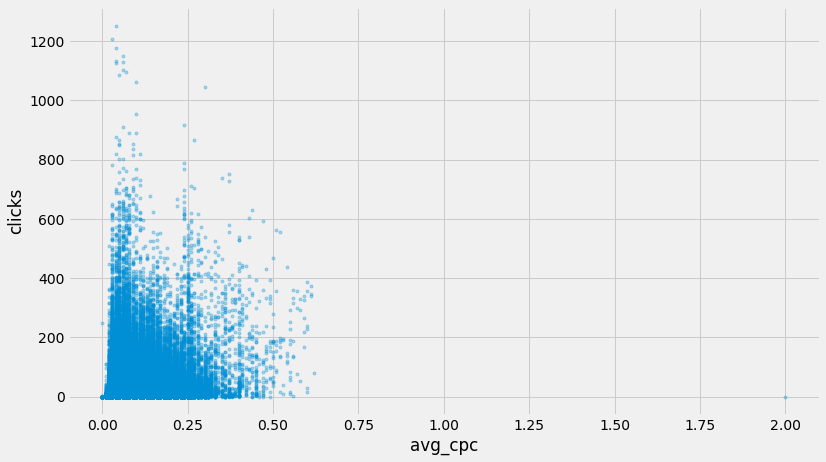

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel("avg_cpc")
plt.ylabel("clicks")
plt.plot(data.avg_cpc, data["clicks"],'.', alpha = 0.3)

##### 1.2.1.3 my_price and clicks Analysis

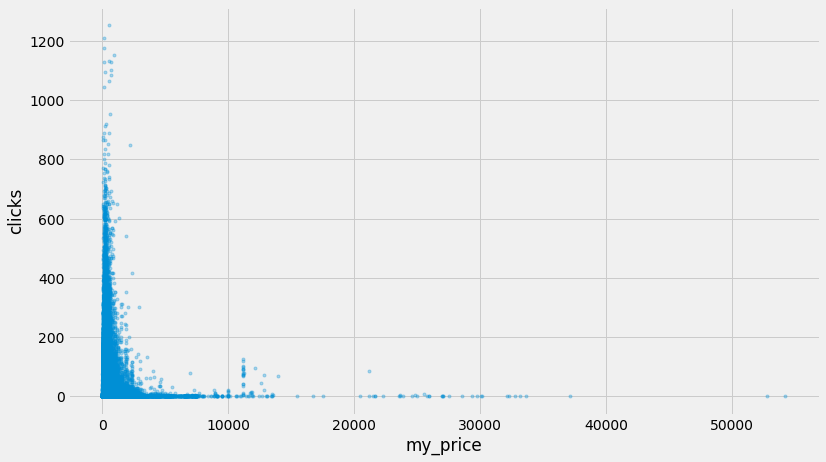

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel("my_price")
plt.ylabel("clicks")
plt.plot(data.my_price, data["clicks"],'.', alpha = 0.3)

##### 1.2.1.4 top4_min__price and clicks Analysis

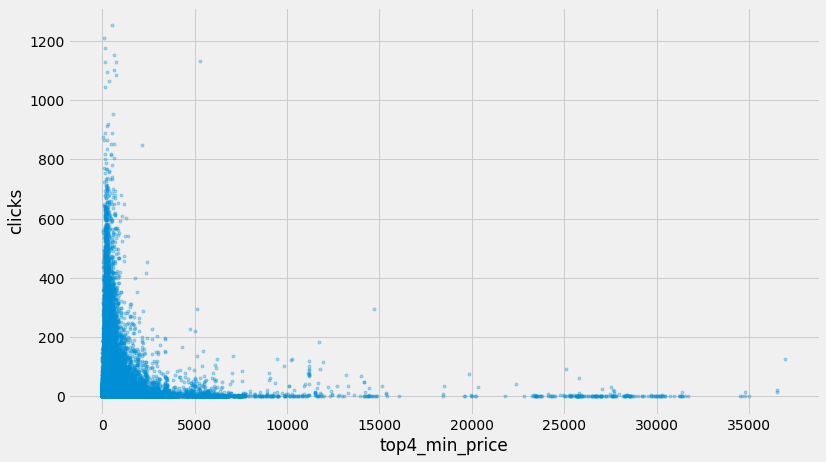

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel("top4_min_price")
plt.ylabel("clicks")
plt.plot(data.top4_min_price, data["clicks"],'.', alpha = 0.3)

##### 1.2.1.5 total_min_price and clicks Analysis

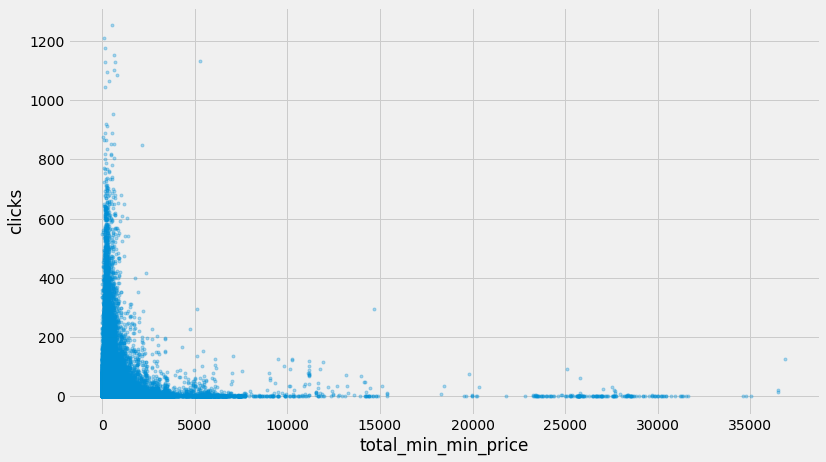

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel("total_min_min_price")
plt.ylabel("clicks")
plt.plot(data.total_min_price, data["clicks"],'.', alpha = 0.3)

##### 1.2.1.6 rival1_price and clicks Analysis

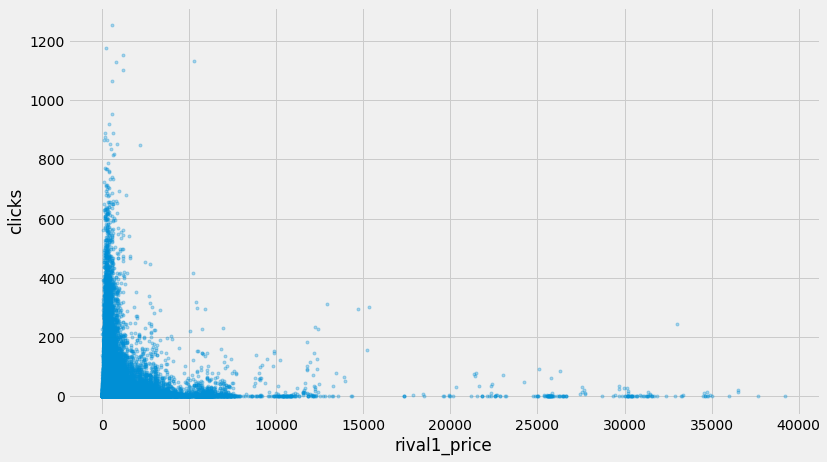

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel("rival1_price")
plt.ylabel("clicks")
plt.plot(data.rival1_price, data["clicks"],'.', alpha = 0.3)

##### 1.2.1.7 rival2_price and clicks Analysis

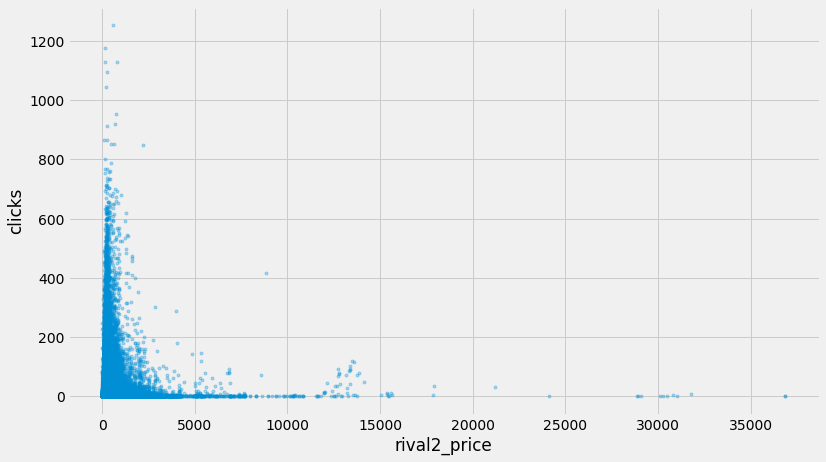

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel("rival2_price")
plt.ylabel("clicks")
plt.plot(data.rival2_price, data["clicks"],'.', alpha = 0.3)

#### 1.2.1.8 profit and clicks

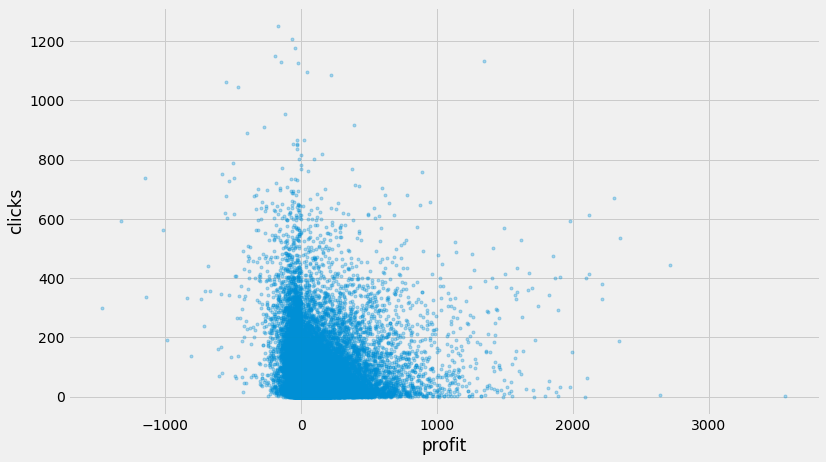

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel("profit")
plt.ylabel("clicks")
plt.plot(data.profit, data["clicks"],'.', alpha = 0.3)

##### 1.2.1.9 revenue and clicks Analysis

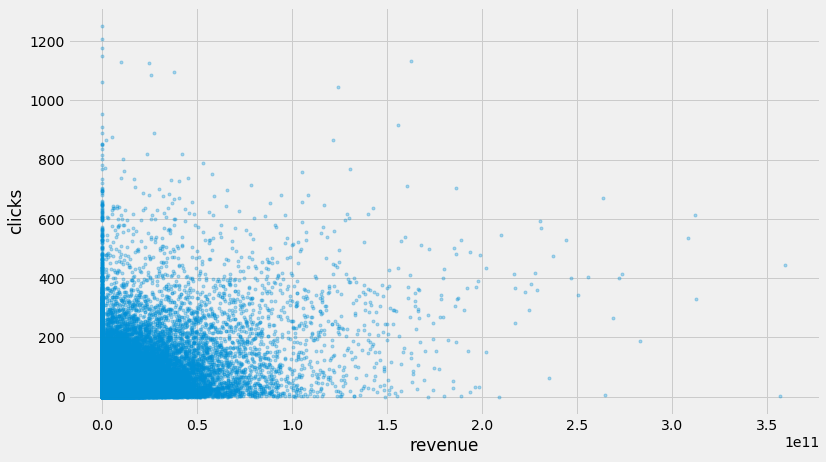

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel("revenue")
plt.ylabel("clicks")
plt.plot(data.revenue, data["clicks"],'.', alpha = 0.3)

##### 1.2.1.10 total_night and clicks Analysis

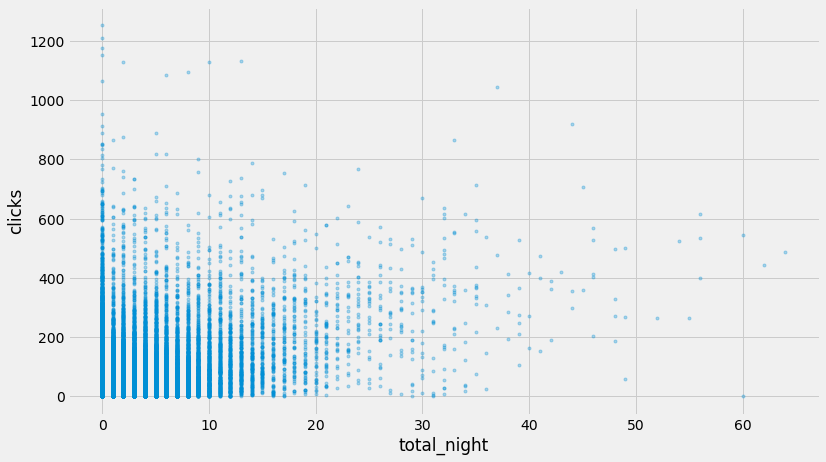

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel("total_night")
plt.ylabel("clicks")
plt.plot(data.total_night, data["clicks"],'.', alpha = 0.3)

##### 1.2.1.11 total_rooms and clicks Analysis

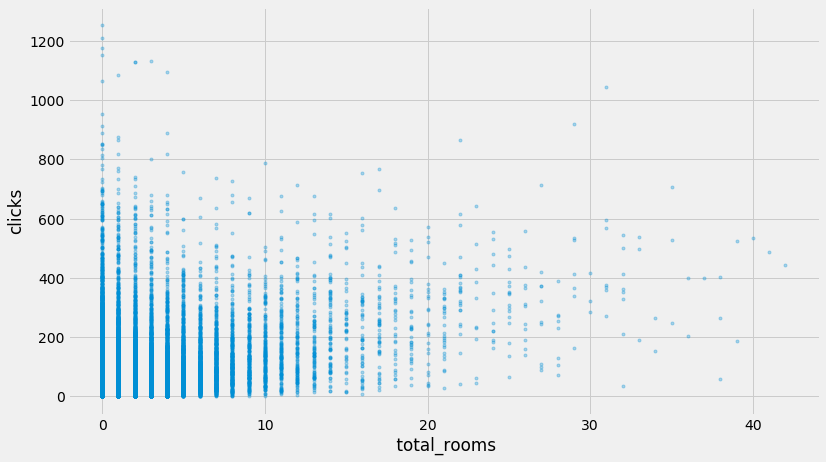

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel(" total_rooms")
plt.ylabel("clicks")
plt.plot(data. total_rooms, data["clicks"],'.', alpha = 0.3)

##### 1.2.1.12 holiday_diff and clicks Analysis

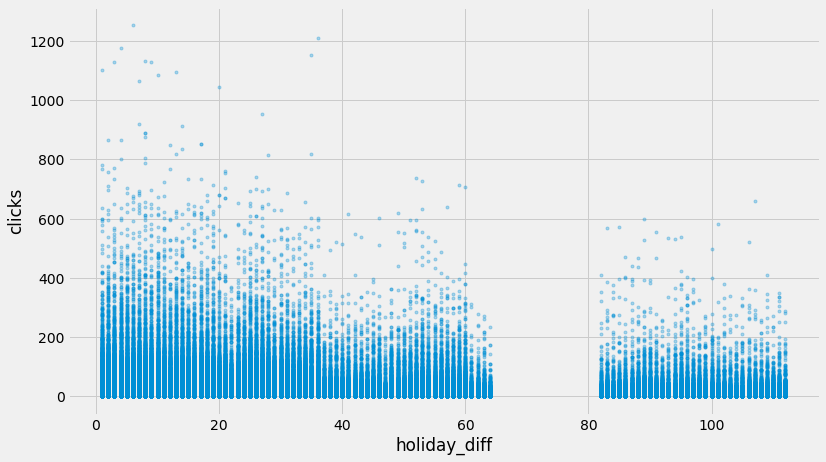

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel("holiday_diff")
plt.ylabel("clicks")
plt.plot(data.holiday_diff, data["clicks"],'.', alpha = 0.3)

##### 1.2.1.13 days_of_holiday and clicks Analysis

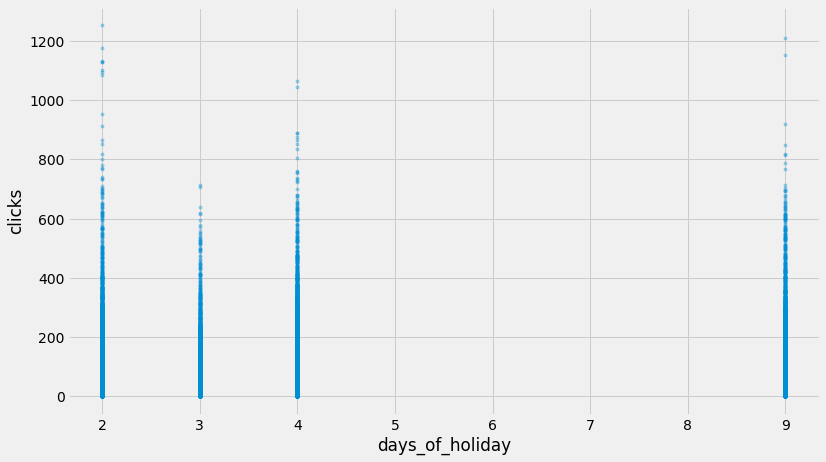

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel("days_of_holiday")
plt.ylabel("clicks")
plt.plot(data.days_of_holiday, data["clicks"],'.', alpha = 0.3)

##### 1.2.1.14 kur and clicks Analysis

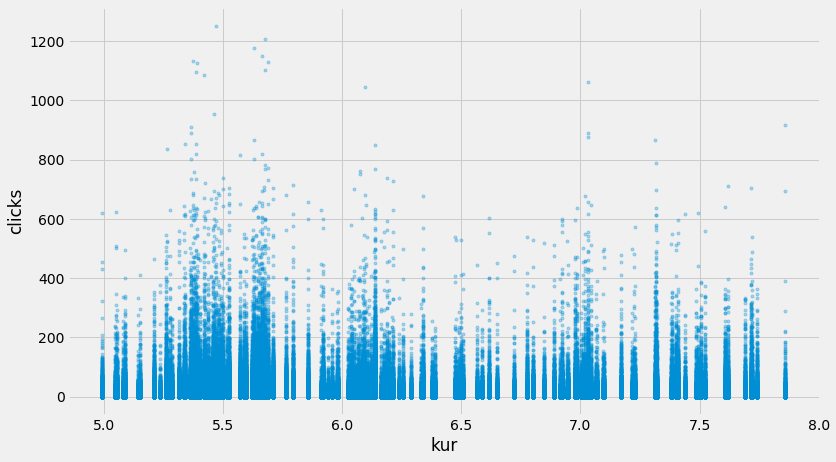

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel("kur")
plt.ylabel("clicks")
plt.plot(data.kur, data["clicks"],'.', alpha = 0.3)

##### 1.2.1.15 opp_cpc and clicks Analysis

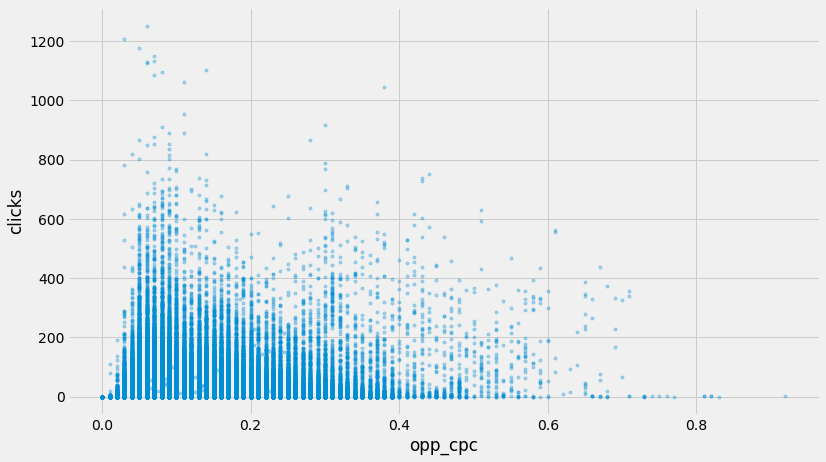

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel("opp_cpc")
plt.ylabel("clicks")
plt.plot(data.opp_cpc, data["clicks"],'.', alpha = 0.3)

##### 1.2.1.16 revenue and clicks Analysis

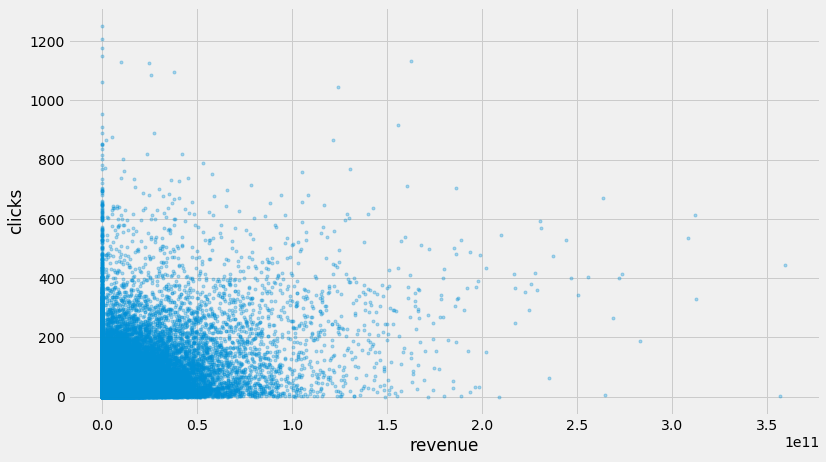

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel("revenue")
plt.ylabel("clicks")
plt.plot(data.revenue, data["clicks"],'.', alpha = 0.3)

### 1.2.2 Categorical Variables and clicks

In [ ]:
categorical_features = data.select_dtypes(include=[np.object])
categorical_features.dtypes

trivago_id             object
booking_value_index    object
stars                  object
weekday                object
log_date               object
hotel_types            object
my_min_position        object
rival1_min_position    object
rival2_min_position    object
bolge                  object
Status                 object
log_date_month         object
dtype: object

### 1.2.2.1 Impact of trivago_id on clicks

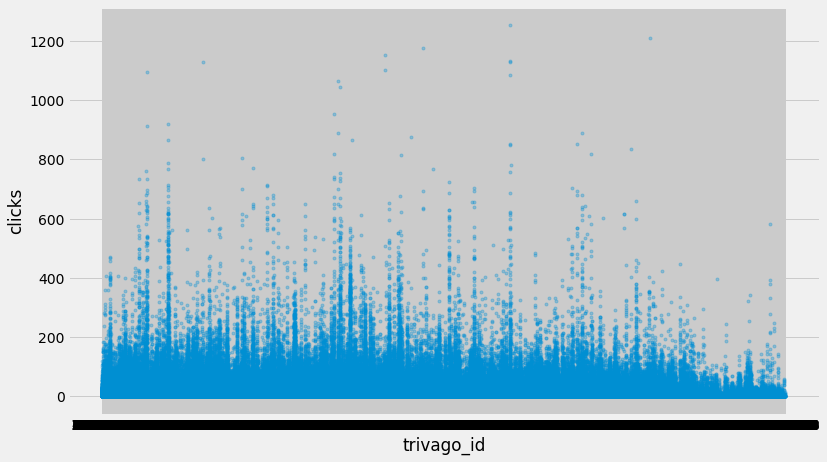

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel("trivago_id")
plt.ylabel("clicks")
plt.plot(data.trivago_id , data["clicks"],'.', alpha = 0.3)

### 1.2.2.2 Impact of weekday on clicks

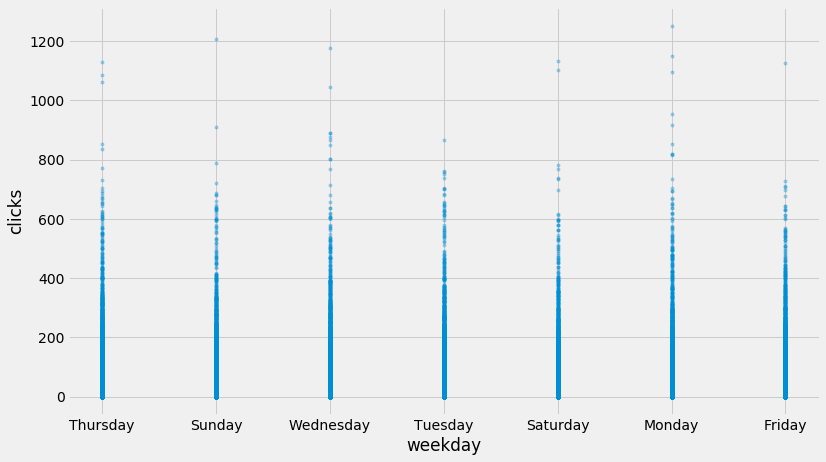

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel("weekday")
plt.ylabel("clicks")
plt.plot(data.weekday , data["clicks"],'.', alpha = 0.3)

### 1.2.2.2 Impact of log_date on clicks

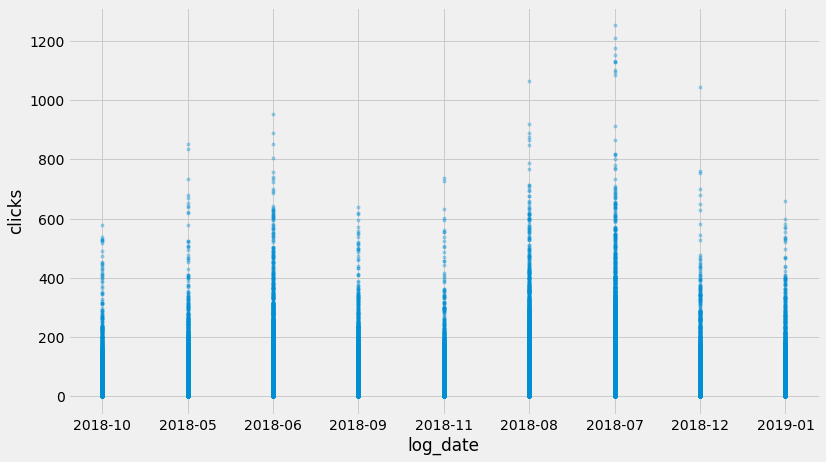

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel("log_date")
plt.ylabel("clicks")
plt.plot(data.log_date , data["clicks"],'.', alpha = 0.3)

### 1.2.2.2 Impact of log_date_month on clicks

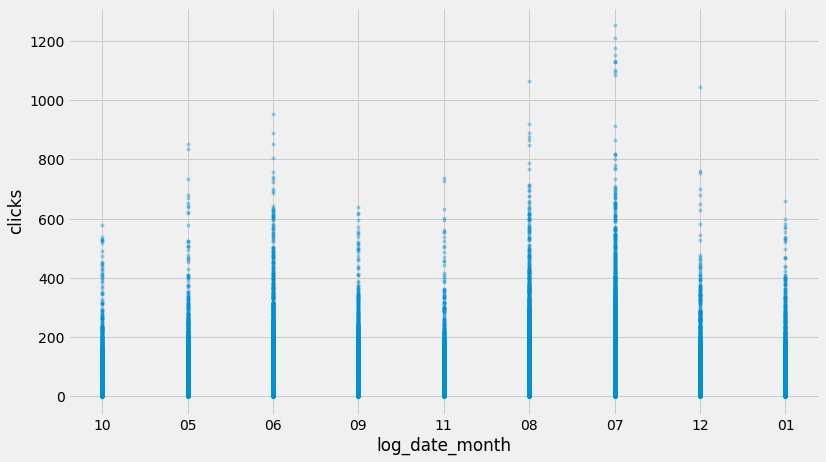

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel("log_date_month")
plt.ylabel("clicks")
plt.plot(data.log_date_month , data["clicks"],'.', alpha = 0.3)

### 1.2.2.2 Impact of hotel_types   on clicks

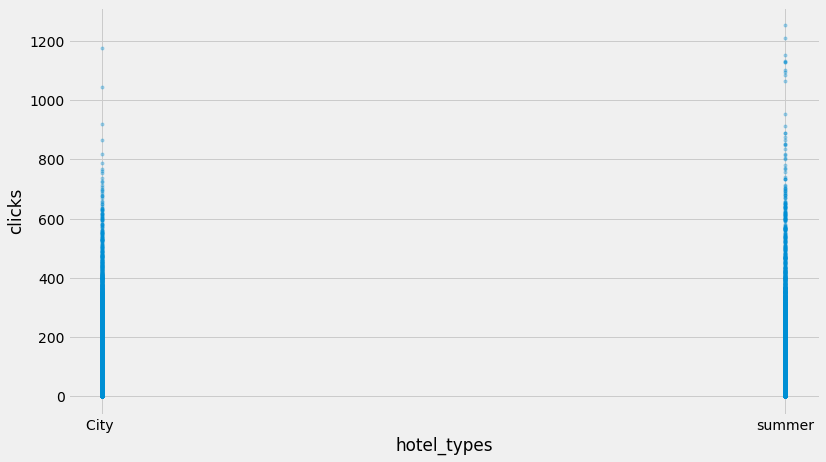

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel("hotel_types")
plt.ylabel("clicks")
plt.plot(data.hotel_types , data["clicks"],'.', alpha = 0.3)

### 1.2.2.2 Impact of bolge on clicks

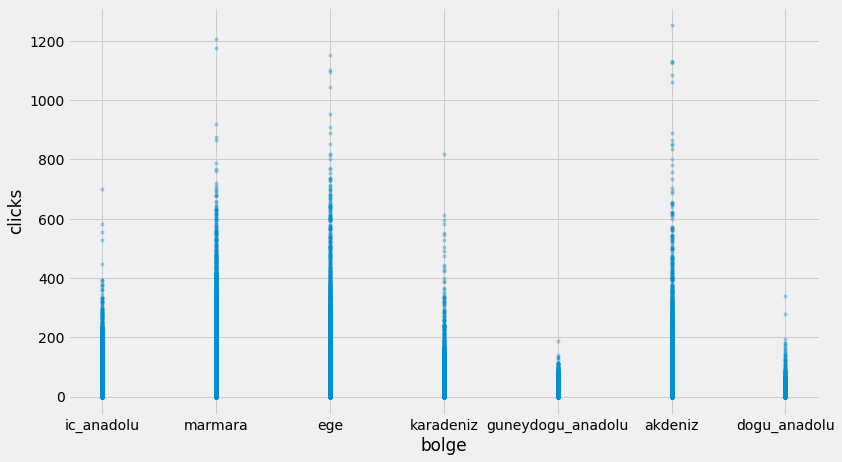

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel("bolge")
plt.ylabel("clicks")
plt.plot(data.bolge , data["clicks"],'.', alpha = 0.3)

## 3. Data Cleaning

#### All Features

In [ ]:
data.head()
data.columns.values
# data.shape   # log_date changed and source added, so 30 columns total

array(['Id', 'trivago_id', 'hotel_impr', 'avg_cpc', 'clicks',
       'booking_value_index', 'stars', 'rating', 'weekday', 'log_date',
       'hotel_types', 'my_min_position', 'my_price', 'top4_min_price',
       'total_min_price', 'rival1_price', 'rival1_min_position',
       'rival2_price', 'rival2_min_position', 'profit', 'revenue',
       'total_night', 'total_rooms', 'bolge', 'holiday_diff',
       'days_of_holiday', 'Status', 'kur', 'opp_cpc', 'log_date_month'],
      dtype=object)

### Number of missing values per variable

In [ ]:
data.apply(lambda x: sum(x.isnull()))

Id                          0
trivago_id                  0
hotel_impr                  0
avg_cpc                  9050
clicks                      0
booking_value_index         0
stars                       0
rating                      0
weekday                     0
log_date                    0
hotel_types                 0
my_min_position             0
my_price                99086
top4_min_price            522
total_min_price             0
rival1_price           249698
rival1_min_position         0
rival2_price           342084
rival2_min_position         0
profit                  37454
revenue                 28761
total_night             28761
total_rooms             28761
bolge                       0
holiday_diff                0
days_of_holiday             0
Status                  41986
kur                    136970
opp_cpc                 12483
log_date_month              0
dtype: int64

### Percentage of missing values per variable

In [ ]:
data.isnull().sum()/data.shape[0]*100 #show values in percentage

Id                      0.000000
trivago_id              0.000000
hotel_impr              0.000000
avg_cpc                 1.130871
clicks                  0.000000
booking_value_index     0.000000
stars                   0.000000
rating                  0.000000
weekday                 0.000000
log_date                0.000000
hotel_types             0.000000
my_min_position         0.000000
my_price               12.381602
top4_min_price          0.065228
total_min_price         0.000000
rival1_price           31.201797
rival1_min_position     0.000000
rival2_price           42.746180
rival2_min_position     0.000000
profit                  4.680182
revenue                 3.593921
total_night             3.593921
total_rooms             3.593921
bolge                   0.000000
holiday_diff            0.000000
days_of_holiday         0.000000
Status                  5.246492
kur                    17.115516
opp_cpc                 1.559852
log_date_month          0.000000
dtype: flo

## 3.1 Imputing Missing Values

### 3.1.1 Numeric variables which require imputation

#### Imputation of avg_cpc variable with its mean, değişmeli pivot table kullanarak

In [ ]:
#### Determine average the avg_cpc  per hotel:
hotel_avg_cpc = data.pivot_table(values='avg_cpc', index='trivago_id')
hotel_avg_cpc.head()

,avg_cpc
trivago_id,
10000160,0.059394
10000878,0.037403
10001180,0.043975
10002726,0.051088
10008138,0.051961


In [ ]:
#Determine the average weight per item:
#hotel_avg_cpc = data.pivot_table(values='avg_cpc', index='trivago_id')

#Get a boolean variable specifying missing Item_Weight values
#miss_bool = data['avg_cpc'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
#print ('Original #missing: %d'% sum(miss_bool))
#data.loc[miss_bool,'avg_cpc'] = data.loc[miss_bool,'trivago_id'].apply(lambda x: hotel_avg_cpc.loc[x])
#print ('Final #missing: %d'% sum(data['avg_cpc'].isnull()))

In [ ]:
#Determine the avg_cpc per hotel
hotel_avg_cpc = data.pivot_table(values='avg_cpc', index='trivago_id')

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['avg_cpc'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('Original #missing: %d'% sum(miss_bool))

data.loc[miss_bool,'avg_cpc'] = data["avg_cpc"].mean()


# data.loc[miss_bool,'avg_cpc'] = data.loc[miss_bool,'trivago_id'].apply(lambda x: hotel_avg_cpc[x])
print ('Final #missing: %d'% sum(data['avg_cpc'].isnull()))

Original #missing: 9050
Final #missing: 0


##### Imputation of my price with its mean

In [ ]:
#Determine the average price per hotel:
hotel_my_price = data.pivot_table(values='my_price', index='trivago_id')

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['my_price'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('Original #missing: %d'% sum(miss_bool))

data.loc[miss_bool,'my_price'] = data["my_price"].mean()


# data.loc[miss_bool,'avg_cpc'] = data.loc[miss_bool,'trivago_id'].apply(lambda x: hotel_my_price[x])
print ('Final #missing: %d'% sum(data['my_price'].isnull()))

Original #missing: 99086
Final #missing: 0


#### Imputation of top4_min_price with its mean

In [ ]:

hotel_top4_min_price = data.pivot_table(values='top4_min_price', index='trivago_id')

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['top4_min_price'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('Original #missing: %d'% sum(miss_bool))

data.loc[miss_bool,'top4_min_price'] = data["top4_min_price"].mean()


# data.loc[miss_bool,'avg_cpc'] = data.loc[miss_bool,'trivago_id'].apply(lambda x: hotel_top4_min_price[x])
print ('Final #missing: %d'% sum(data['top4_min_price'].isnull()))

Original #missing: 522
Final #missing: 0


##### Imputation of profit  with its mean

In [ ]:
hotel_profit = data.pivot_table(values='profit', index='trivago_id')

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['profit'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('Original #missing: %d'% sum(miss_bool))

data.loc[miss_bool,'profit'] = data["profit"].mean()


# data.loc[miss_bool,'avg_cpc'] = data.loc[miss_bool,'trivago_id'].apply(lambda x: hotel_profit[x])
print ('Final #missing: %d'% sum(data['profit'].isnull()))

Original #missing: 37454
Final #missing: 0


#### Imputation of revenue with its mean

In [ ]:
hotel_revenue = data.pivot_table(values='revenue', index='trivago_id')

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['revenue'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('Original #missing: %d'% sum(miss_bool))

data.loc[miss_bool,'revenue'] = data["revenue"].mean()


# data.loc[miss_bool,'avg_cpc'] = data.loc[miss_bool,'trivago_id'].apply(lambda x: hotel_revenue[x])
print ('Final #missing: %d'% sum(data['revenue'].isnull()))

Original #missing: 28761
Final #missing: 0


###### Imputation of kur with its mean

In [ ]:
hotel_kur = data.pivot_table(values='kur', index='trivago_id')  # değişmeli, ay ve yıla göre olmalı

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['kur'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('Original #missing: %d'% sum(miss_bool))

data.loc[miss_bool,'kur'] = data["kur"].mean()


# data.loc[miss_bool,'avg_cpc'] = data.loc[miss_bool,'trivago_id'].apply(lambda x: hotel_kur[x])
print ('Final #missing: %d'% sum(data['kur'].isnull()))

Original #missing: 136970
Final #missing: 0


#### Imputation of opp_cpc with its mean

In [ ]:
hotel_opp_cpc = data.pivot_table(values='revenue', index='trivago_id')

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['opp_cpc'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('Original #missing: %d'% sum(miss_bool))

data.loc[miss_bool,'opp_cpc'] = data["opp_cpc"].mean()


# data.loc[miss_bool,'avg_cpc'] = data.loc[miss_bool,'trivago_id'].apply(lambda x: hotel_opp_cpc[x])
print ('Final #missing: %d'% sum(data['opp_cpc'].isnull()))

Original #missing: 12483
Final #missing: 0


#### Imputation of rival 1 price with its mean

In [ ]:
hotel_rival1_price = data.pivot_table(values='revenue', index='trivago_id')

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['rival1_price'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('Original #missing: %d'% sum(miss_bool))

data.loc[miss_bool,'rival1_price'] = data["rival1_price"].mean()


# data.loc[miss_bool,'avg_cpc'] = data.loc[miss_bool,'trivago_id'].apply(lambda x: hotel_rival1_price[x])
print ('Final #missing: %d'% sum(data['rival1_price'].isnull()))

Original #missing: 249698
Final #missing: 0


#### Imputation of rival 2 price with its mean

In [ ]:
hotel_rival2_price = data.pivot_table(values='revenue', index='trivago_id')

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['rival2_price'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('Original #missing: %d'% sum(miss_bool))

data.loc[miss_bool,'rival2_price'] = data["rival2_price"].mean()


# data.loc[miss_bool,'avg_cpc'] = data.loc[miss_bool,'trivago_id'].apply(lambda x: hotel_rival1_price[x])
print ('Final #missing: %d'% sum(data['rival2_price'].isnull()))

Original #missing: 342084
Final #missing: 0


#### Imputation of total night with its mean

In [ ]:
hotel_total_night = data.pivot_table(values='total_night', index='trivago_id')

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['total_night'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('Original #missing: %d'% sum(miss_bool))

data.loc[miss_bool,'total_night'] = data["total_night"].mean()


# data.loc[miss_bool,'total_night'] = data.loc[miss_bool,'trivago_id'].apply(lambda x: hotel_total_night[x])
print ('Final #missing: %d'% sum(data['total_night'].isnull()))

Original #missing: 28761
Final #missing: 0


#### Imputation of total rooms with its mean

In [ ]:
hotel_total_rooms = data.pivot_table(values='total_rooms', index='trivago_id')

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['total_rooms'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('Original #missing: %d'% sum(miss_bool))

data.loc[miss_bool,'total_rooms'] = data["total_rooms"].mean()


# data.loc[miss_bool,'total_rooms'] = data.loc[miss_bool,'trivago_id'].apply(lambda x: hotel_total_rooms[x])
print ('Final #missing: %d'% sum(data['total_rooms'].isnull()))

Original #missing: 28761
Final #missing: 0


### 3.1.2  Categorical variables which require imputation

#### Impute 'Status' variable according to mode of the 'bolge' variable

In [ ]:
##### Import mode function:
from scipy.stats import mode

#Determing the count for each, (mode function : be careful, https://stackoverflow.com/questions/44692923/python-mode-imputation-apply-mode-for-one-column-on-another)

Status_mode = data.pivot_table(values='Status',
                                   columns='bolge',
                                   aggfunc=lambda x: x.mode().iat[0])
print (Status_mode)

#Get a boolean variable specifying missing Outlet_Size values
miss_bool = data['Status'].isnull() 

# Impute data and check missing values before and after imputation to confirm

print ('\nOriginal #missing: %d'% sum(miss_bool))
data.loc[miss_bool,'Status'] = data.loc[miss_bool,'bolge'].apply(lambda x:Status_mode[x])
print (sum(data['Status'].isnull()))





bolge   akdeniz dogu_anadolu             ege guneydogu_anadolu ic_anadolu  \
Status  Güneşli    AzBulutlu  ParçalıBulutlu           Güneşli  AzBulutlu   

bolge        karadeniz         marmara  
Status  ParçalıBulutlu  ParçalıBulutlu  

Original #missing: 41986
0


#### Impute my_min_position with its mode

In [ ]:
my_min_position_mode = data.pivot_table(values='my_min_position',
                                   columns='bolge',
                                   aggfunc=lambda x: x.mode().iat[0])
print (my_min_position_mode)

#Get a boolean variable specifying missing Outlet_Size values
miss_bool = data['my_min_position'].isnull() 

# Impute data and check missing values before and after imputation to confirm

print ('\nOriginal #missing: %d'% sum(miss_bool))
data.loc[miss_bool,'my_min_position'] = data.loc[miss_bool,'bolge'].apply(lambda x: my_min_position_mode[x])
print (sum(data['my_min_position'].isnull()))

bolge           akdeniz dogu_anadolu  ege guneydogu_anadolu ic_anadolu  \
my_min_position     1.0          1.0  1.0               1.0        1.0   

bolge           karadeniz marmara  
my_min_position       1.0     1.0  

Original #missing: 0
0


#### Impute rival1_min_position with its mode

In [ ]:
rival1_min_position_mode = data.pivot_table(values='rival1_min_position',
                                   columns='bolge',
                                   aggfunc=lambda x: x.mode().iat[0])
print (rival1_min_position_mode)

#Get a boolean variable specifying missing Outlet_Size values
miss_bool = data['rival1_min_position'].isnull() 

# Impute data and check missing values before and after imputation to confirm

print ('\nOriginal #missing: %d'% sum(miss_bool))
data.loc[miss_bool,'rival1_min_position'] = data.loc[miss_bool,'bolge'].apply(lambda x: rival1_min_position_mode[x])
print (sum(data['rival1_min_position'].isnull()))


bolge               akdeniz dogu_anadolu  ege guneydogu_anadolu ic_anadolu  \
rival1_min_position     nan          nan  nan               nan        1.0   

bolge               karadeniz marmara  
rival1_min_position       nan     1.0  

Original #missing: 0
0


#### Impute rival2_min_position with its mode

In [ ]:
rival2_min_position_mode = data.pivot_table(values='rival2_min_position',
                                   columns='bolge',
                                   aggfunc=lambda x: x.mode().iat[0])
print (rival2_min_position_mode)

#Get a boolean variable specifying missing Outlet_Size values
miss_bool = data['rival2_min_position'].isnull() 

# Impute data and check missing values before and after imputation to confirm

print ('\nOriginal #missing: %d'% sum(miss_bool))
data.loc[miss_bool,'rival2_min_position'] = data.loc[miss_bool,'bolge'].apply(lambda x: rival2_min_position_mode[x])
print (sum(data['rival2_min_position'].isnull()))

bolge               akdeniz dogu_anadolu  ege guneydogu_anadolu ic_anadolu  \
rival2_min_position     nan          nan  nan               nan        nan   

bolge               karadeniz marmara  
rival2_min_position       nan     nan  

Original #missing: 0
0


## 4 Numerical and One-Hot Coding of Categorical variables

#### 4.1 Label Encoder

In [ ]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var_mod = ['weekday', 'log_date','log_date_month','stars','booking_value_index','hotel_types', 'bolge', 'my_min_position','rival1_min_position','rival2_min_position','Status']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

#### 4.2 One Hot Coding:

In [ ]:
data = pd.get_dummies(data, columns=['weekday', 'log_date', 'log_date_month','hotel_types', 'bolge', 'my_min_position','rival1_min_position','rival2_min_position','Status'])

## 4.3 Final data dimension and variables

In [ ]:
print(data.shape)
print(data.dtypes)
# data.columns.values

(800268, 468)
Id                           int64
trivago_id                  object
hotel_impr                   int64
avg_cpc                    float64
clicks                       int64
booking_value_index          int32
stars                        int32
rating                     float64
my_price                   float64
top4_min_price             float64
total_min_price              int64
rival1_price               float64
rival2_price               float64
profit                     float64
revenue                    float64
total_night                float64
total_rooms                float64
holiday_diff                 int64
days_of_holiday              int64
kur                        float64
opp_cpc                    float64
weekday_0                    uint8
weekday_1                    uint8
weekday_2                    uint8
weekday_3                    uint8
weekday_4                    uint8
weekday_5                    uint8
weekday_6                    uint8
log_da

## 5. Model 

#### Create training and testing data sets, 80 % for training, 20 % for testing


In [ ]:
clicks =data.clicks # define target
X_train, X_test, y_train, y_test = train_test_split(data, clicks, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(640214, 468) (640214,)
(160054, 468) (160054,)


In [ ]:
# Rename just for the sake of easiness
train = X_train
test = X_test

In [ ]:
# Drop target column from test set
#test.drop(['clicks'],axis=1,inplace=True)


# 5. Model Building

## Define a generic function which takes the algorithm and data as input and makes the model, performs cross-validation and shows performance 


In [ ]:
#Define target and ID columns:
target = 'clicks'
IDcol = ['Id','trivago_id']

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring= 'neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    

    Test_RMSE = sqrt(mean_squared_error(dtest.target, dtest.clicks))
    print ("\nModel Report Test_RMSE")
    print(Test_RMSE)
    
    
    
    
    #Export submission file:
    #IDcol.append(target)
    #submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    #submission.to_csv(filename, index=False)

# Linear Regression Model


Model Report
RMSE : 21.69
CV Score : Mean - 1.599e+14 | Std - 9.795e+13 | Min - 21.65 | Max - 3.517e+14


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


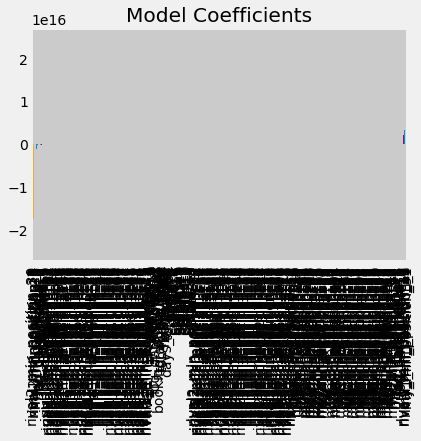

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1_trivago.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

# Ridge Regression Model:


Model Report
RMSE : 22.2
CV Score : Mean - 22.2 | Std - 0.8089 | Min - 20.69 | Max - 23.76


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


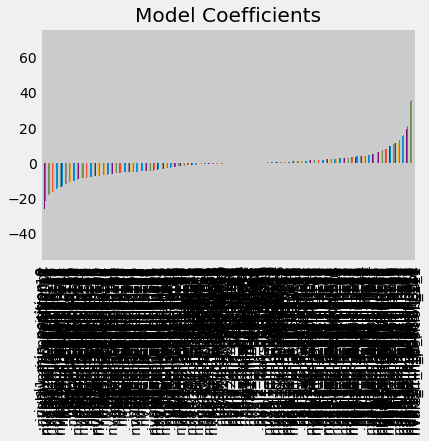

In [ ]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg2 = Ridge(alpha=0.05,normalize=True)
modelfit(alg2, train, test, predictors, target, IDcol, 'alg2.csv')
coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

# Decision Tree Model


Model Report
RMSE : 18.54
CV Score : Mean - 19.28 | Std - 0.7768 | Min - 17.93 | Max - 20.81


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


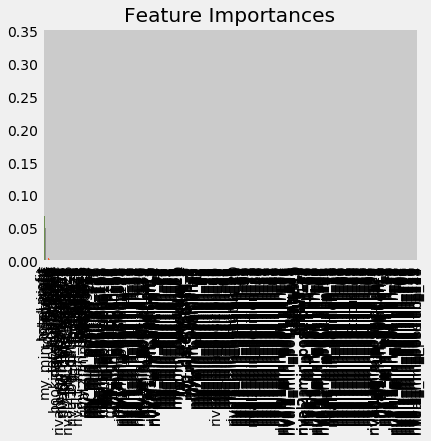

In [ ]:
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

# Random Forest Model


Model Report
RMSE : 20.15
CV Score : Mean - 20.27 | Std - 0.8728 | Min - 19.06 | Max - 21.93


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


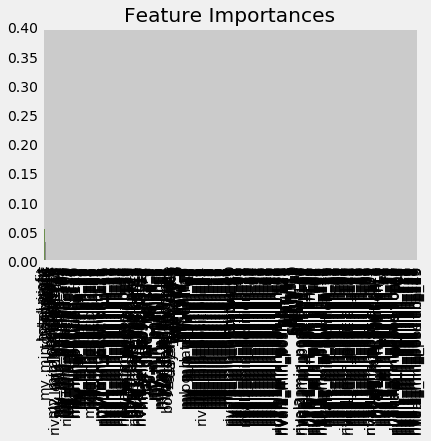

In [ ]:
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg4 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
modelfit(alg4, train, test, predictors, target, IDcol, 'alg4.csv')
coef4 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

#### RF with different different parameters

In [ ]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg5 = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)
modelfit(alg5, train, test, predictors, target, IDcol, 'alg5.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')